# Module 3 Assessment

Welcome to your Mod 3 Assessment. You will be tested for your understanding of concepts and ability to solve problems that have been covered in class and in the curriculum.

Use any libraries you want to solve the problems in the assessment.

_Read the instructions carefully_. You will be asked both to write code and respond to a few short answer questions.

**Note on the short answer questions**: For the short answer questions please use your own words. The expectation is that you have not copied and pasted from an external source, even if you consult another source to help craft your response. While the short answer questions are not necessarily being assessed on grammatical correctness or sentence structure, you should do your best to communicate yourself clearly.

The sections of the assessment are:
- Combinatorics, Probability and Discrete Distributions
- Statistical Distributions
- Statistical Tests
- Bayesian Statistics



In [4]:
# import the necessary libraries
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import pickle
import math

## Part 1: Combinatorics, Probability & Discrete Distributions [Suggested time: 20 minutes]

### a. Set Theory

Given the following probabilities:

$P(A) = 0.7$

$P(B) = 0.5$

$P(B|A) = 0.4$

Calculate the following probabilities and assign to the variables `ans1` and `ans2`, respectively, in the next cell:

1.a.1) $P(A and B)$
1.a.2) $P(A|B)$

Hint: draw a diagram!


In [5]:
# Prior
p_a = 0.7 
p_b = 0.5

# Likelyhood
p_b_given_a = 0.4 

# Posterior
p_a_given_b = (p_b_given_a *p_a)/(p_b)  


ans1 = p_b * p_a_given_b
ans2 = p_a_given_b

print(ans1, ans2)

0.27999999999999997 0.5599999999999999


### b. Card Combinatorics

A standard deck of playing cards consists of 52 cards in each of the four suits of spades, hearts, diamonds, and clubs. Each suit contains 13 cards: Ace, 2, 3, 4, 5, 6, 7, 8, 9, 10, Jack, Queen, and King.
    
You have a standard deck of 52 cards and are asked the following questions:

1.b.1) What is the probability of drawing a King or a Queen?

1.b.2) How many possible 5-card combinations can be formed with this deck of 52 cards?

Answer the questions below:

In [6]:
p_king = 4/52
p_queen = 4/52
ans1 = p_king + p_queen # mutaully exclusive event. You cannot draw both a king and queen... unless hermaphrodite... I think 

def combinations(n,k):
    comb = math.factorial(n)/(math.factorial(n-k)*math.factorial(k))  
    return comb
ans2 = combinations(52,5)

print(ans1)
print(ans2)

0.15384615384615385
2598960.0


### c. Discrete Probability Distributions

In a game with the same deck of 52 cards, you draw a card $n$ times with replacement. You win a point by drawing a face card (Jack, Queen, or King). 

The function `probability_of_scoring_k` is provided below. In this function, $k$ is the number of points won in the game, $n$ is the number of draws, and $p$ is the probability of winning a point. The function returns the corresponding probability of scoring $k$ points given $n$ and $p$.

In [7]:
def probability_of_scoring_k(n, p, k):
    """
    n = number of draws
    p = probability of winning a point
    k = number of points scored
    
    Use np.factorial()
    
    """
    
    # defining a helper function for factorial
    def fact(n):
        return np.math.factorial(n)
    
    return (fact(n)/(fact(k)*fact(n-k)))*(p**(k))*((1-p)**(n-k))

1.c.1) What is the probability $p$ of winning a point? 

In [8]:
# your code here 
p_king = 4/52
p_queen = 4/52
p_joker = 4/52
p_king_queen_joker = (p_king + p_queen + p_joker) # Again mutaully exclusive

p = p_king_queen_joker 
p

0.23076923076923078

1.c.2) Use the function `probability_of_scoring_k` to compute the probability of scoring 8 points out out of 22 draws.

In [9]:
# your code here 
ans1 = probability_of_scoring_k(22, p, 8)
print(ans1)

0.06532117736042573


1.c.3) Use the function `probability_of_scoring_k` to calculate the probability of drawing $k$ points out of 22 draws, for $k$ ranging from 0 to 22. 

_Hint: Your final result should be in the form of a list or array._

In [10]:
# your code here
k_values = range(23)
prob = [probability_of_scoring_k(22,p,k) for k in range(23)]
prob 

[0.003113481211226729,
 0.020548975994096417,
 0.06472927438140372,
 0.12945854876280743,
 0.18447843198700062,
 0.1992367065459607,
 0.16935120056406663,
 0.1161265375296457,
 0.06532117736042573,
 0.03048321610153201,
 0.011888454279597485,
 0.0038907668551409957,
 0.001069960885163774,
 0.0002469140504224094,
 4.761913829575039e-05,
 7.619062127320063e-06,
 1.0000019042107584e-06,
 1.0588255456349209e-07,
 8.823546213624342e-09,
 5.57276602965748e-10,
 2.5077447133458666e-11,
 7.164984895273905e-13,
 9.770433948100781e-15]

1.c.4) Plot your results to create the probability mass function. Use a bar plot. What type of distribution does the `probability_of_scoring_k` have?

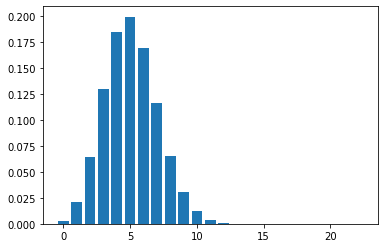

In [11]:
# your code here 
plt.bar(k_values, prob);

In [12]:
"""
Distibution looks normal but is actually a discrtete distrbution. This discrete distirbution is a binomial distrubtion.
"""

'\nDistibution looks normal but is actually a discrtete distrbution. This discrete distirbution is a binomial distrubtion.\n'

## Part 2: Statistical Distributions [Suggested time: 25 minutes]

### a. Normal Distributions

Say we have check totals for all checks ever written at a TexMex restaurant. 

The distribution for this population of check totals happens to be normally distributed with a population mean of $\mu = 20$ and population standard deviation of $\sigma = 2$. 

2.a.1) Write a function to compute the z-scores for single checks of amount `check_amt`.

In [13]:
def z_score(check_amt):
    """
    check_amt = the amount for which we want to compute the z-score
    """
    # Z = (x-pop_m)/std
    
    x = check_amt
    mu = 20
    sigma = 2
    z = (x - mu)/sigma
    return z 

2.a.2) I go to the TexMex restaurant and get a check for 24 dollars. 

Use your function to compute your check's z-score, and interpret the result using the empirical rule. 

In [14]:
# your code here 
z_score(24)

2.0

In [15]:
# your answer here
"""
The z score transforms the data to a standard normal distribution with mean 0 and std 1. 
Therefore, a z score of 2 is two sttandard deviations from the mean. The empirical rule states that 95% of the data
is contained between +- 2 standard deviations for a roughly normal distribution.
"""

'\nThe z score transforms the data to a standard normal distribution with mean 0 and std 1. \nTherefore, a z score of 2 is two sttandard deviations from the mean. The empirical rule states that 95% of the data\nis contained between +- 2 standard deviations for a roughly normal distribution.\n'

2.a.3) Using $\alpha = 0.05$, is my 25 dollar check significantly **greater** than the mean? How do you know this?  

Hint: Here's a link to a [z-table](https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf). 

In [16]:
# your code here 
z25 = z_score(25)
p_value = 1-stats.norm.cdf(z25)
print(z25, '\n', p_value, sep='')

2.5
0.006209665325776159


In [17]:
# your answer here 
"""
Yes, $25 check is significantly greater than the mean. 
The probability of getting a z score >= 2.5 is ~0.006%, which is below our 0.05% alpha level.
"""
None

### b. Confidence Intervals and the Central Limit Theorem

2.b.1) Determine the 95% confidence interval around the mean check total for this population. Interpret your result. 

In [18]:
# your code here 
z_crit = stats.norm.ppf(q = 0.975)  #  z-critical value for 95% confidence OR (95% + 5%/2) = 95% + 2.5%
pop_stdev=2
mu=20
margin_of_error = z_crit * (pop_stdev)
conf = (mu - margin_of_error, mu + margin_of_error)
conf

(16.080072030919894, 23.919927969080106)

In [19]:
# your written answer here
"""
I used sigma instend of standard error because I was not given a sample size. 
This CI tells us for a popullation where the average check is $20 and standard deviation 2, 
95% of the time the true mean should fall within this range of $16 - $24
"""

'\nI used sigma instend of standard error because I was not given a sample size. \nThis CI tells us for a popullation where the average check is $20 and standard deviation 2, \n95% of the time the true mean should fall within this range of $16 - $24\n'

2.b.2) Imagine that we didn't know how the population of check totals was distributed. How would **sampling** and the **Central Limit Theorem** allow us to **make inferences on the population mean**, i.e. estimate $\mu, \sigma$ of the population mean?

In [20]:
# Your written answer here
"""
The central limit theorem states that regardless of the population distribution, as the number of independent samples 
increases, the sample means will become normally distributed around the population mean
with standard error equal to population standard deviation sigma/sqrt(sample size)
"""

'\nThe central limit theorem states that regardless of the population distribution, as the number of independent samples \nincreases, the sample means will become normally distributed around the population mean\nwith standard error equal to population standard deviation sigma/sqrt(sample size)\n'

## Part 3: Statistical Testing [Suggested time: 15 minutes]

The TexMex restaurant recently introduced Queso to its menu.

We have random samples of 1000 "No Queso" order check totals and 1000 "Queso" order check totals for orders made by different customers.

In the cell below, we load the sample data for you into the arrays `no_queso` and `queso` for the "no queso" and "queso" order check totals. Then, we create histograms of the distribution of the check amounts for the "no queso" and "queso" samples. 

In [21]:
# Load the sample data 
no_queso = pickle.load(open("data/no_queso.pkl", "rb"))
queso = pickle.load(open("data/queso.pkl", "rb"))

# Plot histograms

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Non-Queso Check Totals')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')
ax1.hist(no_queso, bins=20)

ax2.set_title('Sample of Queso Check Totals')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')
ax2.hist(queso, bins=20)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data/no_queso.pkl'

### a. Hypotheses and Errors

The restaurant owners want to know if customers who order Queso spend **more or less** than customers who do not order Queso.

3.a.1) Set up the null $H_{0}$ and alternative hypotheses $H_{A}$ for this test.

In [ ]:
# Your written answer here
"""
H0: mean_of_queso = mean_of_no_queso 
H1: mean_of_queso != mean_of_no_queso 
"""

3.a.2) What does it mean to make `Type I` and `Type II` errors in this specific context?

In [ ]:
# your answer here
"""
Type1 error concludes that queso and no_queso ordering customers spend the same amount but we said they didn't(False positive)
Type2 error concludes that queso and no_queso ordering customers do spend the same but we said they didn't (False negative)
"""

### b. Sample Testing

3.b.1) Run a statistical test on the two samples. Use a significance level of $\alpha = 0.05$. You can assume the two samples have equal variance. Can you reject the null hypothesis? 

_Hint: Use `scipy.stats`._

In [2]:
# your code here 
alpha = 0.05

result = stats.ttest_ind(no_queso, queso, equal_var=True) 
crit = stats.t.ppf(q=(1-(alpha/2)), df=(len(no_queso)+len(queso)-2))

print(result)
print(crit)

NameError: name 'no_queso' is not defined

In [ ]:
# your answer here
"""
Alpha = 0.05
P-value = 1.463174719189721e-307

Since p-value is less than alpha, I am rejecting the null. Average check for no queso customers is significantly lower.
p-value is below the 5% significance level (2.5% on either side) and t-statistic is larger than critical t
"""

## Part 4: Bayesian Statistics [Suggested time: 15 minutes]
### a. Bayes' Theorem

Thomas wants to get a new puppy 🐕 🐶 🐩 


<img src="https://media.giphy.com/media/rD8R00QOKwfxC/giphy.gif" />

He can choose to get his new puppy either from the pet store or the pound. The probability of him going to the pet store is $0.2$. 

He can choose to get either a big, medium or small puppy.

If he goes to the pet store, the probability of him getting a small puppy is $0.6$. The probability of him getting a medium puppy is $0.3$, and the probability of him getting a large puppy is $0.1$.

If he goes to the pound, the probability of him getting a small puppy is $0.1$. The probability of him getting a medium puppy is $0.35$, and the probability of him getting a large puppy is $0.55$.

4.a.1) What is the probability of Thomas getting a small puppy?
4.a.2) Given that he got a large puppy, what is the probability that Thomas went to the pet store?
4.a.3) Given that Thomas got a small puppy, is it more likely that he went to the pet store or to the pound?
4.a.4) For Part 2, what is the prior, posterior and likelihood?

In [23]:
ans1 = 0.2*0.6 + 0.8*0.1
ans2 = 0.1*0.2/(0.2*0.1 + 0.8*0.55)

p1 = 0.6*0.2/0.2 #p(store|small)
p2 = 0.1*0.8/0.2 #p(pound|small)
ans3 = "pet store"

ans4_prior = "p(store)"
ans4_posterior = 'p(store|large)'
ans4_likelihood = "p(large|store)"


print(ans1, '\n', ans2, '\n', ans3, '\n', ans4_prior, '\n', ans4_posterior, '\n', ans4_likelihood, sep='')

0.2
0.043478260869565216
pet store
p(store)
p(store|large)
p(large|store)


In [26]:
print('P2:', p2 > p1, 'P1:', p1 > p2)

P2: False P1: True
